In [1]:
from AnglesCalibration import * #th, zeta, dtheta and lamda are defined in AnglesCalibration.py
from Readh5 import *
import datetime

In [2]:
def export_DeltaNu_Image(image_1D, imageFilename, log = True):
    delta, twotheta = PixelsToAngles(image_1D[:,0], image_1D[:,1])
    if log:
        image_1D[:,2] = np.log(image_1D[:,2])
    t1 = datetime.datetime.now()
    fig = plt.figure(figsize=(12,10),dpi=100)
    axes = fig.add_axes([0.,0.1,1,0.85]) # left, bottom, width, height (range 0 to 1)
    plt.scatter(twotheta, delta, c=image_1D[:,2],rasterized=True, cmap=cm.nipy_spectral,vmin=0,vmax=12)
    plt.xlabel(r'2'+r'$\theta$'+ ' [' + r'$^o$' + ']', fontsize=25)
    plt.ylabel(r'$\delta$'+ ' [' + r'$^o$' + ']', fontsize=25)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    axes.set_aspect('equal')
    
    divider = make_axes_locatable(axes)
    cax = divider.append_axes("right", size="5%", pad=0.3)
    cbar = plt.colorbar(cax=cax)
    cbar.set_label('Log',fontsize=15)
    cbar.ax.tick_params(labelsize=20)
    
    axes.set_ylim(19.5,6.8)
    axes.set_xlim(20.1,8.3)

    for tick in axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    fig.savefig(imageFilename)
    plt.show()

    t2 = datetime.datetime.now()
    print(t2-t1)

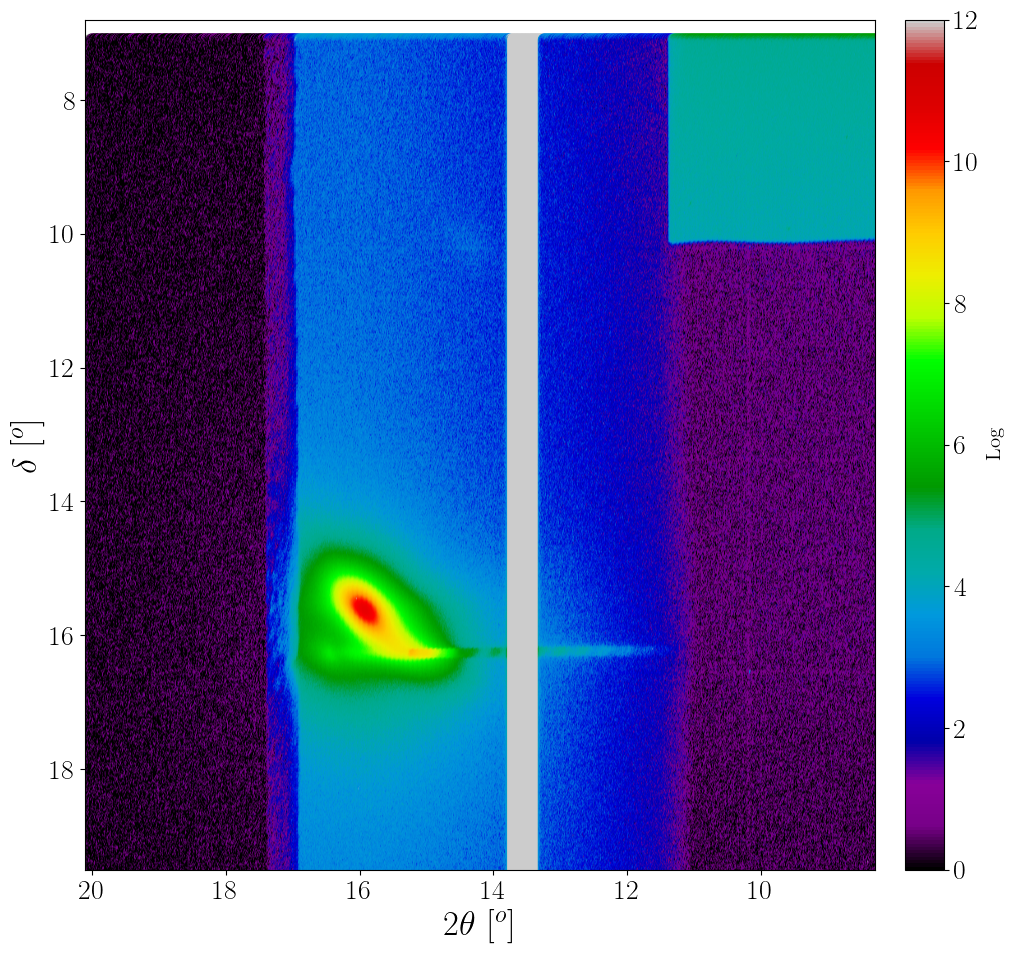

0:01:10.373357


In [3]:
masterFilename3 = '/Users/Rui/Google Drive/Research/STONY BROOK/Matt Dawber/NSLS2/ISR/Summer2017/Data/calibration/calibrate_020_004_master.h5'
#masterFilename3 = '/Users/Rui/Google Drive/Research/STONY BROOK/Matt Dawber/NSLS2/ISR/Summer2017/Data/ISR0615172_map500_4uc/map500_4uc_004_000_master.h5'
image3 = exportImageArray(masterFilename3)
image_1D3 = Convertto1D(image3)
imageFilename3 = '/Users/Rui/Google Drive/Research/STONY BROOK/Matt Dawber/NSLS2/ISR/Summer2017/Images/Test_DeltaNu_delta12.pdf'
export_DeltaNu_Image(image_1D3, imageFilename3, log=True)

In [4]:
def export_DeltaNu_Image_slice(image_1D, imageFilename, log = True):
    delta, twotheta = PixelsToAngles(image_1D[:,0], image_1D[:,1])
    if log:
        image_1D[:,2] = np.log(image_1D[:,2])
    t1 = datetime.datetime.now()
    fig = plt.figure(figsize=(14,5.5),dpi=100)

    axes = fig.add_axes([0.1,0.11,0.85,0.85]) # left, bottom, width, height (range 0 to 1)
    plt.scatter(twotheta,delta, c=image_1D[:,2],rasterized=True, cmap=cm.nipy_spectral,vmin=0,vmax=12)
    plt.xlabel(r'2'+r'$\theta$'+ ' [' + r'$^o$' + ']', fontsize=25)
    plt.ylabel(r'$\delta$'+ ' [' + r'$^o$' + ']', fontsize=25)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    axes.set_aspect('equal')
    
    divider = make_axes_locatable(axes)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    cbar = plt.colorbar(cax=cax)
    cbar.set_label('Log',fontsize=15)
    cbar.ax.tick_params(labelsize=20)
    axes.set_ylim(16.5,14.5)
    axes.set_xlim(17,11.7)
    for tick in axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    fig.savefig(imageFilename)
    plt.show()

    t2 = datetime.datetime.now()
    print(t2-t1)

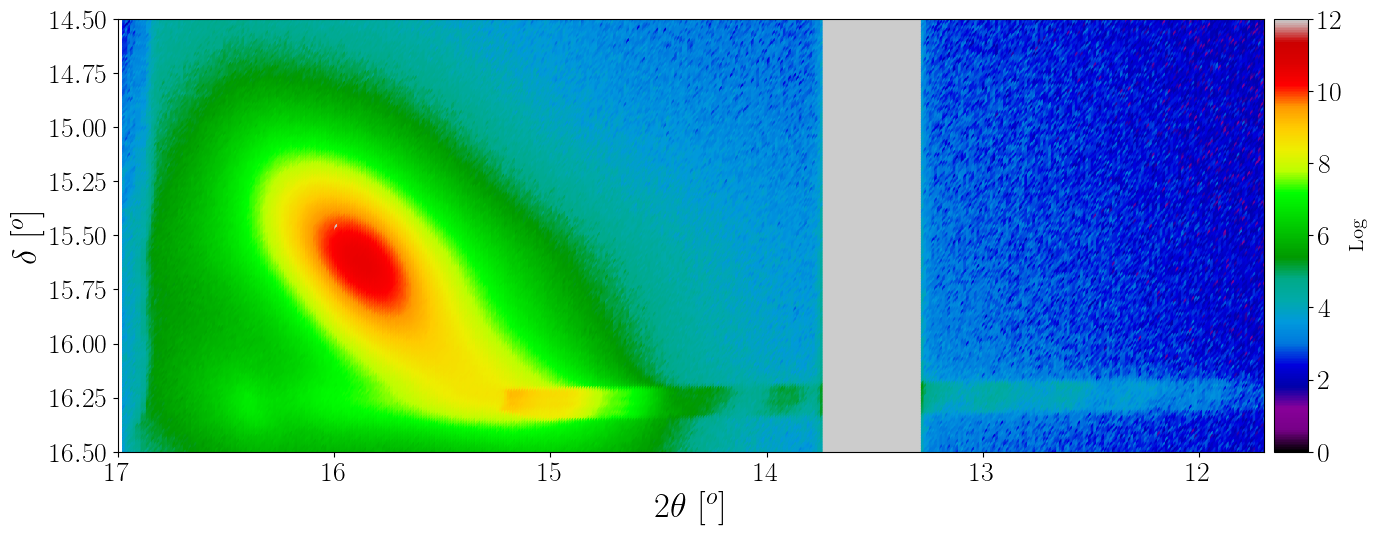

0:00:09.240215


In [5]:
masterFilename3 = '/Users/Rui/Google Drive/Research/STONY BROOK/Matt Dawber/NSLS2/ISR/Summer2017/Data/calibration/calibrate_020_004_master.h5'
#masterFilename3 = '/Users/Rui/Google Drive/Research/STONY BROOK/Matt Dawber/NSLS2/ISR/Summer2017/Data/ISR0615172_map500_4uc/map500_4uc_004_000_master.h5'
image3 = exportImageArray(masterFilename3)
sliceYindexes = [250,700]
sliceXindexes = [600,900]
image_slice3 = image3[sliceYindexes[0]:sliceYindexes[1], sliceXindexes[0]:sliceXindexes[1]]
image_1D_slice3 = Convertto1D_slice(sliceXindexes[0],sliceYindexes[0],image_slice3)
sliceimageFilename3 = '/Users/Rui/Google Drive/Research/STONY BROOK/Matt Dawber/NSLS2/ISR/Summer2017/Images/Test_DeltaNu_slice_delta12.pdf'
export_DeltaNu_Image_slice(image_1D_slice3, sliceimageFilename3, log=True)